<a href="https://colab.research.google.com/github/SenseiBassa/Selore-Nig_Customer-Segmentation-Unsupervised-Learning-Machine-Learning/blob/main/Selore_Nig_Customer_Segmentation_Using_Unsupervised_Learning_Techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Selore Nigeria Limited**

---

## **About the business - Selore**

---

Selore Nigeria is a popular electronics retail chain in Nigeria that specializes in the sale of mobile phones, tablets, laptops, and other related accessories. The company was founded in 2022 and has since grown to become one of the largest retailers of mobile phones and related products in the country.

Selore Nigeria offers a wide range of mobile phones from top brands such as Samsung, Apple, Nokia, and Huawei, among others. The company is also known for its after- sales support, including repairs and maintenance services, as well as trade-in options for old devices. With its numerous outlets nationwide, Selore Nigeria is a go-to destination for many Nigerians seeking to purchase mobile phones and related accessories.


## **Business Problem:**

A retail company wants to understand the spending behaviour of its customers to target them with personalized marketing campaigns. They have collected data on customer demographics (age, gender) and spending habits (annual income, spending score) and want to segment their customers based on their spending behaviour. The objective of this project is to build a customer segmentation model to help the retail company in developing targeted marketing strategies.


## **Data Collection:**

---

The retail company has collected data on 200 customers containing 
• CustomerID, 
• Gender, Age, 
• Annual Income (ks), 
• Spending Score.


## **Goal:**

---

The goal of this project is to segment customers based on their purchasing behaviour and demographic information. We will use unsupervised learning techniques to identify groups of customers with similar behaviour and characteristics. This information can be used to develop targeted marketing campaigns, personalize product recommendations, and optimize pricing strategies.

## **Unsupervised Machine Learning - Clustering using K-means**
K-means clustering is an unsuperbised learning techniques that is suitable for working with unlabelled data lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on based on the features that are provided.

In [ ]:
# Import necessary libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
data = pd.read_excel(r'/content/Customers.xlsx')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.columns = ['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score']

In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

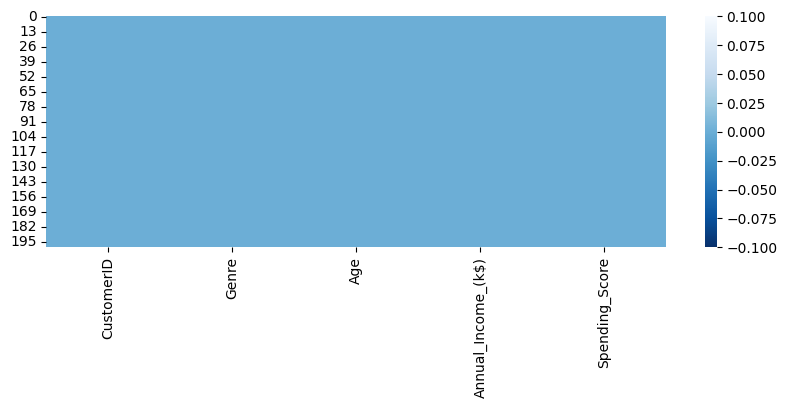

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Pre-Processing

In [ ]:
# Check for duplicates
print(data.duplicated().sum())

0


### Exploratory Data Analysis

* Univariate
* Bivariate
* Multivariate

### Univariate Analysis

In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

<Axes: xlabel='CustomerID'>

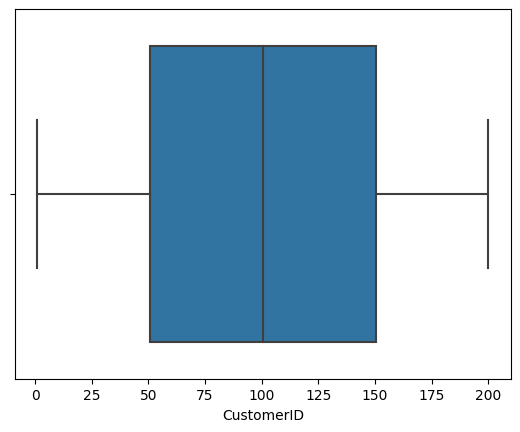

In [ ]:
# Check for outliers
sns.boxplot(x=data["CustomerID"])

Narration:

There are no outliers present in the illustration depicted above.

<Axes: xlabel='Age'>

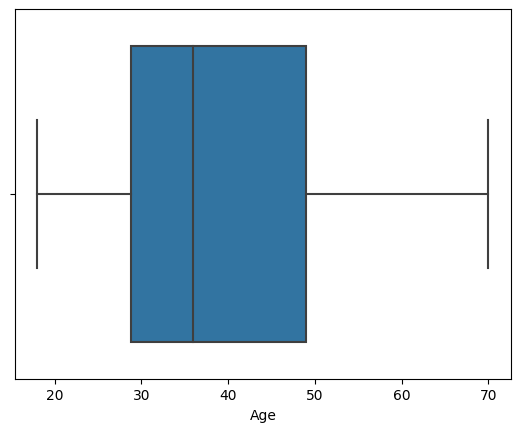

In [ ]:
# Check for outliers
sns.boxplot(x=data["Age"])

### Narration:

There are no outliers present in the illustration depicted above.

<Axes: xlabel='Annual_Income_(k$)'>

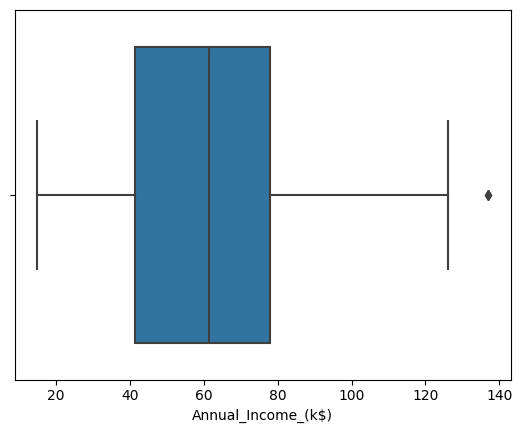

In [ ]:
# Check for outliers
sns.boxplot(x=data["Annual_Income_(k$)"])

### Narration

There is an outlier present in the illustration depicted above.

<Axes: xlabel='Spending_Score'>

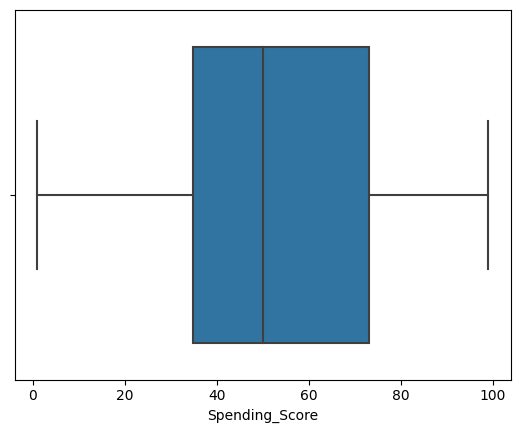

In [ ]:
# Check for outliers
sns.boxplot(x=data["Spending_Score"])

### Narration


There are no outliers present in the illustration depicted above.

### Bivariate Analysis

In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

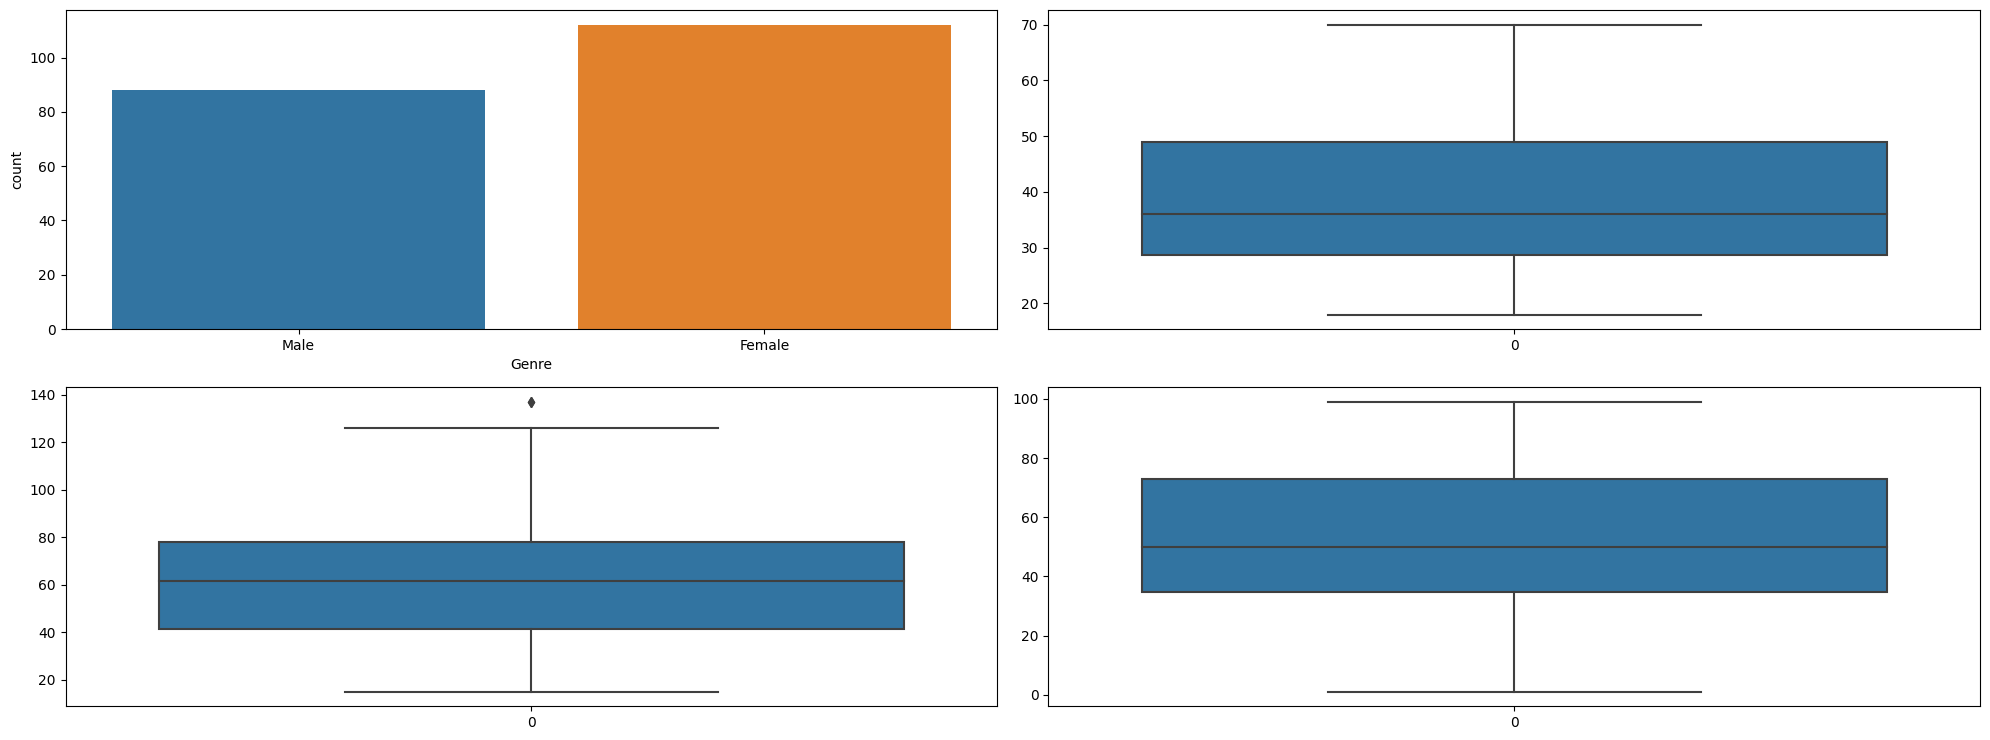

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

### Narration:

Regarding gender, we have a greater number of female customers compared to male customers. Concerning annual income, there is only one data point that falls outside the expected range.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in data.columns[1:]:
  if(data[c].dtype=='object'):
    data[c] = encoder.fit_transform(data[c])
  else:
    data[c] = data[c]

data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Remove CustomerID Column
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Elbow Method

After applying te k-means Clustering algorithm, we can determine te optimal number of clusters by using the Elbow Method. This method involves plotting the Within Cluster Sum of Squares (WCCS) against the number of clusters (K) and selecting the value of k where  the rate decrease in WCSS slowss down signifcantly. In the graph  below, we can observe that after k=3, there is no significant decrease in WCSS, indicating that 3 is the optimal number of clusters in this case. Although the optimal value of k decrease in WCSS slows down significantly. 

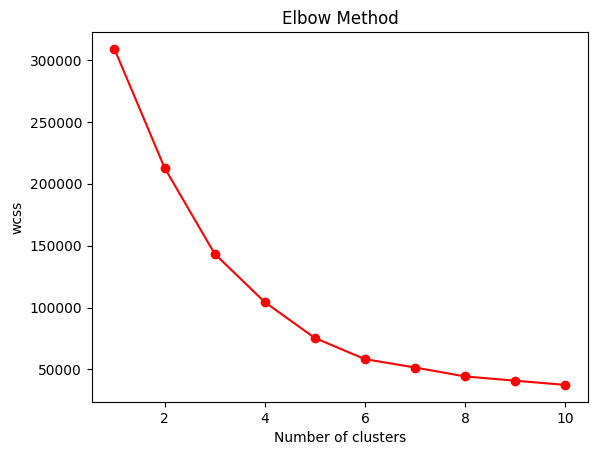

In [ ]:
# Determine optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#  Narration:
5 is the optimal number of clusters with the kmeans

# Summary

In this block, the objective is to determine the optimal number of clusters for K-means clustering algoithm. The optimal number of clusters is important because it affects the quality of the clustering results.

The within-cluster sum  of squares(WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distancebetween each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point were the WCSS starts to decrease at slower rate.

The for loop reiterates over a range of values from 1 to 10, creating a KMeans clustering model for each value of i. The 'init' parameter is set to 'k-means++', which is a method to initalize the centroids in a smart way to speedup convergence. The 'random_state' parameteris set to 42 for reproducibility. The 'fit' method is used to fit the KMeans to the data, and the inertia (WCSS) is computed and appended to the 'wcss' list.

Finally, a plot is created with the number to clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. In this case, the plot shows that the optimal number of clusters is 5 as the WCSS starts to decrease at a slower rate beyond that point.

In [ ]:
from sklearn.cluster import KMeans

# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

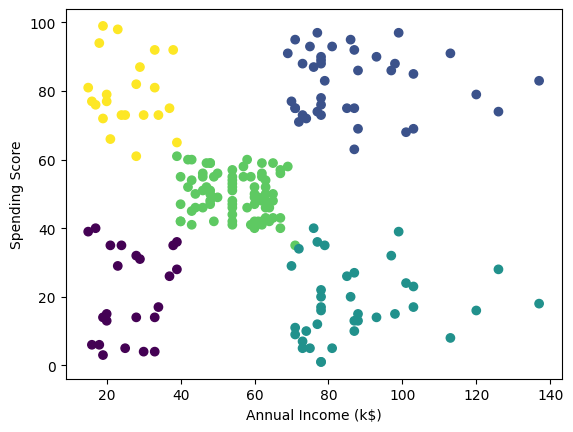

0.44493777835059417

In [ ]:
import matplotlib.pyplot as plt

# Visualize cluster results

plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#Calculate silhouette Score - evaluation matrix of the clustering algorthim 0.44 

from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.labels_)

### Conclusion:

The clustering algorithm has been evaluated by customers and has received a score of 0.44. This algorithm divides customers into five distinct groups based on their income and spending habits: low-income individuals with low spending, low-income individuals with high spending, middle-income individuals who spend an average amount, high-income individuals who spend a lot, and high-income individuals who spend very little.
